In [15]:
# pickle을 이용한 데이터 불러오기
import pickle
data = pickle.load(open("mid_animal_data_pub.pkl", "rb"))

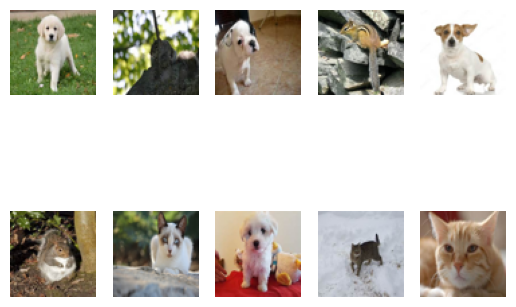

In [16]:
# 문제 1. 데이터 불러오고 출력하기
# data['test1_images']에 있는 이미지를 출력해보세요.
import matplotlib.pyplot as plt


for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.axis("off")
    plt.imshow(data['test1_images'][i])

plt.show()

In [17]:
a = data['train_vectors'][0]
b = data['test1_vectors'][1]

def cosine(a, b):
    return (a * b).sum() / (((a*a).sum() ** 0.5) * ((b*b).sum() ** 0.5))

print(cosine(a, b))

-0.23914207353935832


In [18]:

ids = []
for i in range(10): # for i in range(data['test1_vectors'].shape[0])
    arr = []
    for j in range(data['train_vectors'].shape[0]):
        cos = cosine(data['test1_vectors'][i], data['train_vectors'][j])
        arr.append((cos, j)) # 코사인 유사도와 index 번호를 함께 append
    arr.sort(reverse = True)
    ids.append([y for x,y in arr[:3]])

    s = 0
    for arr in ids:
        for j in arr:
            s += j
print(s)


14090


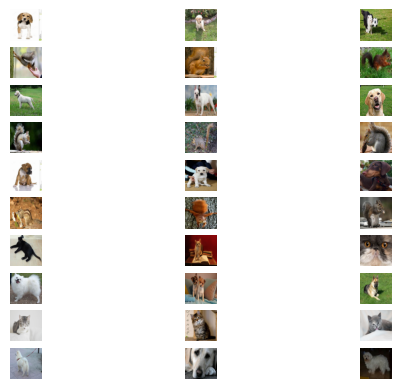

In [19]:
# plt.subplot(1, 3, 1)
# plt.imshow(data['train_images'][346])
# plt.subplot(1, 3, 2)
# plt.imshow(data['train_images'][442])
# plt.subplot(1, 3, 3)
# plt.imshow(data['train_images'][158])
# plt.show()

i = 1
for arr in ids:
    for j in arr:
        plt.subplot(10, 3, i)
        plt.imshow(data['train_images'][j])
        plt.axis("off")
        i += 1

plt.show()

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

x_train = torch.from_numpy(data["train_vectors"])
y_train = torch.from_numpy(data["train_labels"])

model = nn.Linear(256, 3) # 입력 차원의 개수, 클래스의 개수

optim = torch.optim.Adam(model.parameters(), lr = 0.01)

for epoch in range(1001):
    z = model(x_train)
    cost = F.cross_entropy(z, y_train)

    optim.zero_grad()
    cost.backward()
    optim.step()
    
    with torch.no_grad():
        if epoch % 100 == 0:
            print(f"epoch: {epoch}, cost: {cost.item()}")


epoch: 0, cost: 0.7252500057220459
epoch: 100, cost: 0.00033747870475053787
epoch: 200, cost: 0.0001278129784623161
epoch: 300, cost: 7.975220796652138e-05
epoch: 400, cost: 6.138018216006458e-05
epoch: 500, cost: 5.239225356490351e-05
epoch: 600, cost: 4.71619023301173e-05
epoch: 700, cost: 4.368482404970564e-05
epoch: 800, cost: 4.113286195206456e-05
epoch: 900, cost: 3.912240208592266e-05
epoch: 1000, cost: 3.745127105503343e-05


In [21]:
test2 = torch.from_numpy(data['test2_vectors'])
res = torch.argmax(model(test2), dim = 1)


"".join(str(x.item()) for x in res)

'212220001122112100202120111122'